<a href="https://colab.research.google.com/github/signofcommunication/Bible-of-Competitive-Programming/blob/main/Statistika_%26_Probalitas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats

In [39]:
def get_data():
    file_path = "/content/states_all.csv"  # Path file langsung ditentukan
    df = pd.read_csv(file_path, encoding='latin1')  # Ganti encoding jika perlu
    df_numeric = df.select_dtypes(include=[np.number])
    data = df_numeric.dropna().values  # Hapus baris dengan NaN
    return data

# Fungsi menghitung statistik dasar
def calculate_statistics(data):
    mean = np.mean(data, axis=0)
    median = np.median(data, axis=0)
    mode = stats.mode(data, axis=0, keepdims=True).mode[0]
    data_range = np.max(data, axis=0) - np.min(data, axis=0)
    variance = np.var(data, axis=0, ddof=1)
    std_dev = np.std(data, axis=0, ddof=1)
    return mean, median, mode, data_range, variance, std_dev

def determine_bins(data):
    n = len(data)  # Jumlah data
    bins = int(np.ceil(1 + 3.322 * np.log10(n)))  # Rumus Sturges
    return max(bins, 5)  # Minimal 5 bins

# Fungsi membuat tabel distribusi frekuensi
def create_frequency_distribution(data, bins):
    freq_tables = []
    for i in range(data.shape[1]):
        hist, bin_edges = np.histogram(data[:, i], bins=bins)
        freq_table = pd.DataFrame({'Range': [f"{bin_edges[j]} - {bin_edges[j+1]}" for j in range(len(bin_edges)-1)],
                                   'Frequency': hist})
        freq_table['Relative Frequency'] = freq_table['Frequency'] / sum(hist)
        freq_table['Percentage'] = freq_table['Relative Frequency'] * 100
        freq_tables.append(freq_table)
    return freq_tables

# Fungsi menampilkan histogram
def plot_histogram(freq_tables):
    for i, freq_table in enumerate(freq_tables):
        plt.bar(freq_table['Range'], freq_table['Percentage'], color='skyblue')
        plt.xticks(rotation=45, ha='right')
        plt.xlabel('Range')
        plt.ylabel('Percentage')
        plt.title(f'Histogram of Percentage Distribution (Column {i+1})')
        plt.show()

# Fungsi membuat dot plot
def plot_dotplot(data):
    for i in range(data.shape[1]):
        plt.plot(data[:, i], [i+1]*len(data[:, i]), 'bo', alpha=0.5)
        plt.xlabel('Data Values')
        plt.title(f'Dot Plot (Column {i+1})')
        plt.show()

# Fungsi membuat box plot
def plot_boxplot(data):
    sns.boxplot(data=data)
    plt.title('Box Plot')
    plt.show()

# Fungsi menghitung skewness
def calculate_skewness(data):
    skewness = stats.skew(data, axis=0, nan_policy='omit')  # Abaikan NaN
    skew_types = ['Positively skewed (Right-skewed)' if s > 0 else 'Negatively skewed (Left-skewed)' if s < 0 else 'Symmetrical' for s in skewness]
    return skewness, skew_types  # Mengembalikan dua nilai

Mean: [2.00896620e+03 9.31303994e+05 1.09771873e+07 1.00496673e+06
 5.02091806e+06 4.95130253e+06 1.10897319e+07 5.73684926e+06
 3.24715657e+06 4.94134930e+05 1.07461541e+06 2.30989211e+04
 7.07914789e+04 7.08828085e+04 7.21526648e+04 6.46664986e+04
 5.72810637e+05 2.84956358e+05 9.56042580e+05 2.38935211e+02
 2.80980282e+02 2.19943662e+02 2.63600000e+02]
Median: [2.009000e+03 6.651090e+05 6.529894e+06 6.364360e+05 3.193838e+06
 2.487353e+06 6.685029e+06 3.380399e+06 2.050683e+06 3.563890e+05
 6.182840e+05 1.323000e+04 5.226700e+04 5.035400e+04 5.004300e+04
 4.127000e+04 4.052620e+05 1.845880e+05 6.800890e+05 2.400000e+02
 2.820000e+02 2.210000e+02 2.650000e+02]
Mode: [2.00300e+03 4.41790e+04 8.01008e+05 7.58560e+04 0.00000e+00 3.51820e+04
 8.05362e+05 3.30698e+05 2.39435e+05 2.76080e+04 2.00700e+04 8.49900e+03
 6.89100e+03 1.10280e+04 4.32800e+03 6.44750e+04 3.76980e+04 1.68280e+04
 6.94330e+04 2.42000e+02 2.84000e+02 2.23000e+02 2.67000e+02]
Range: [1.2000000e+01 6.2628430e+06 7.3157

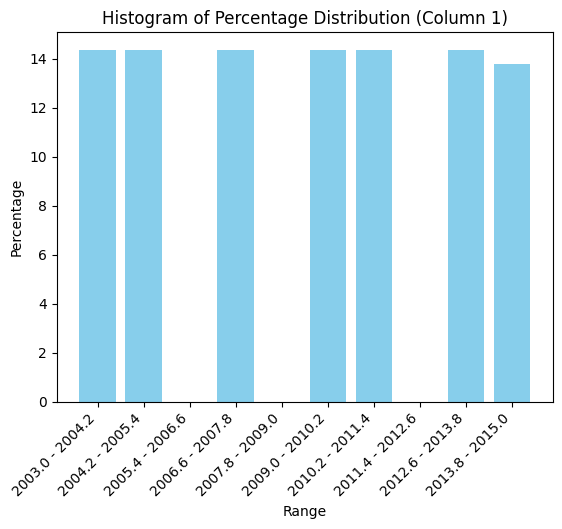

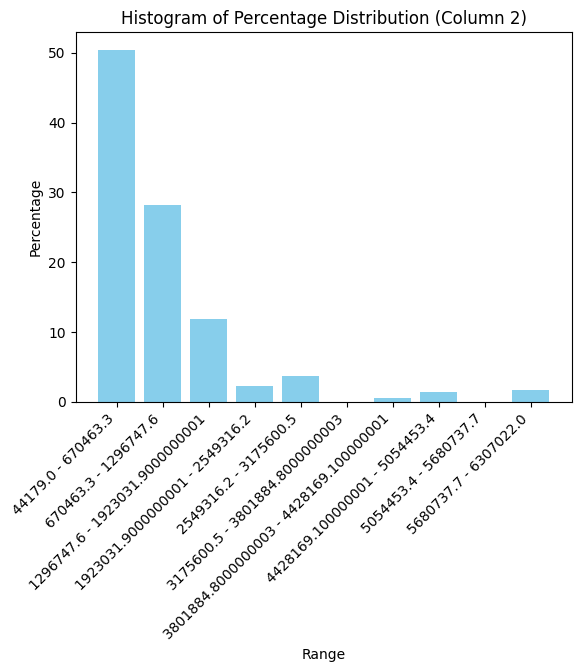

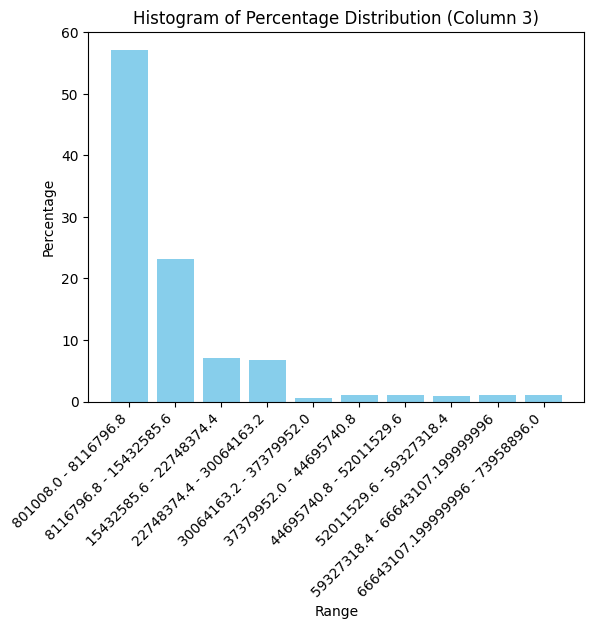

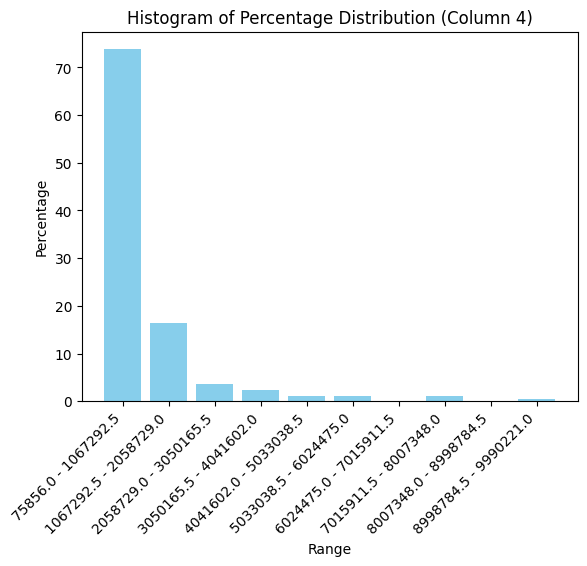

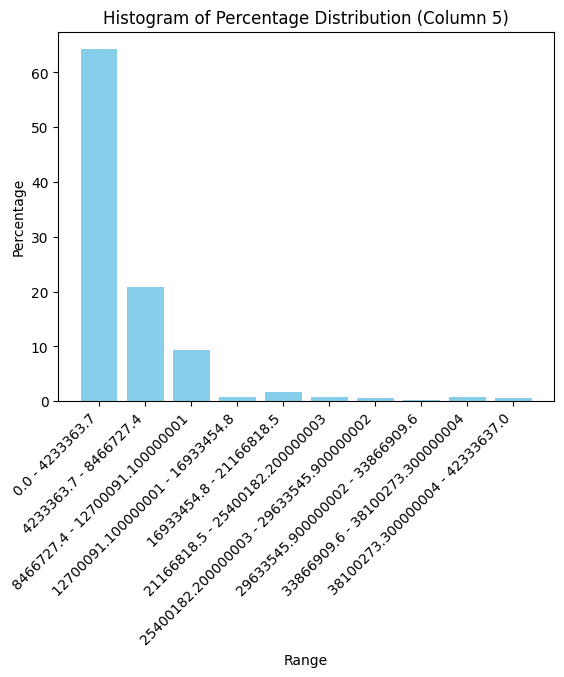

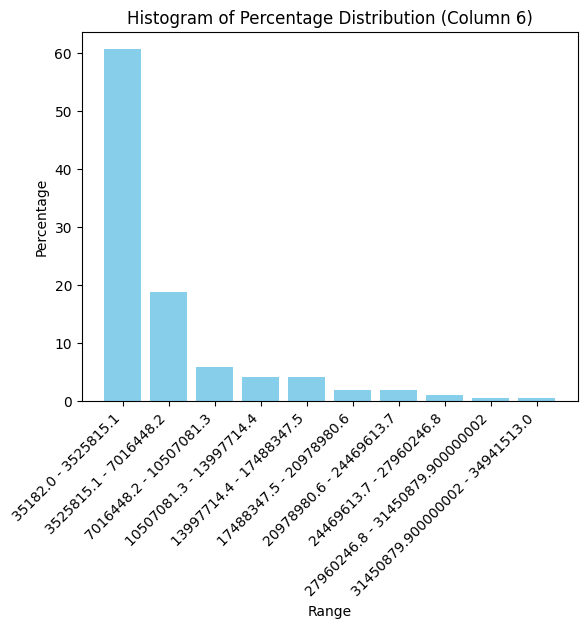

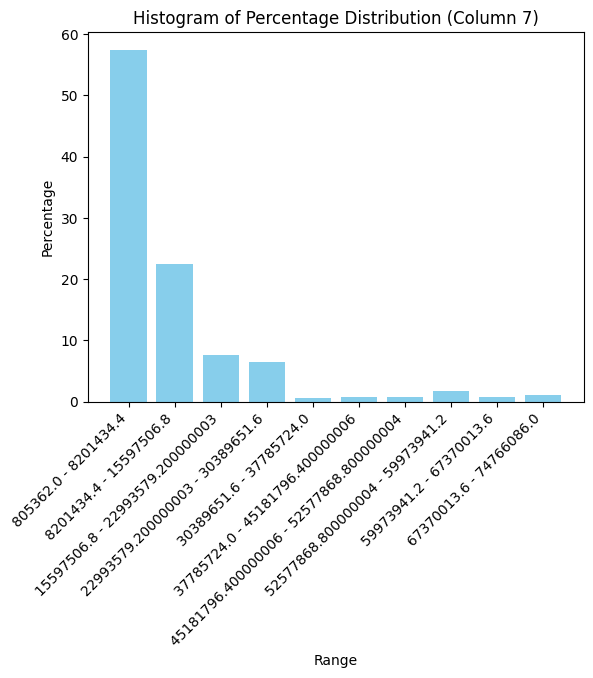

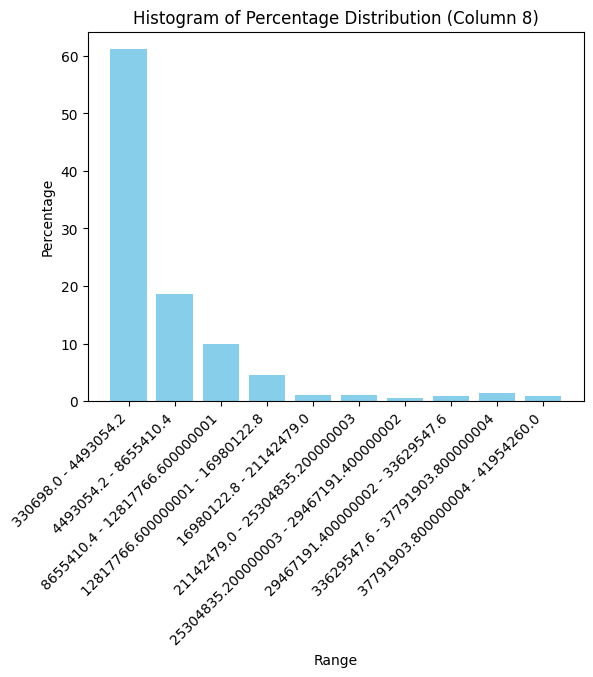

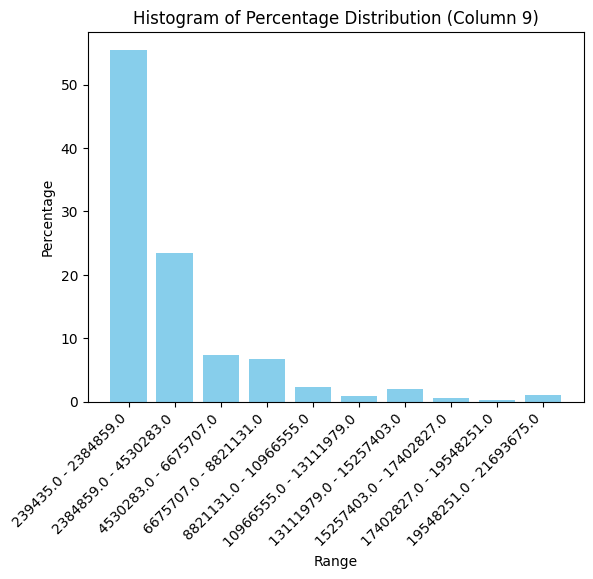

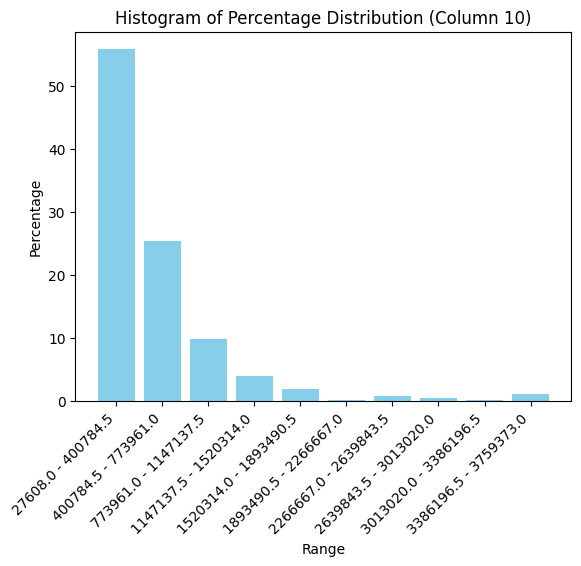

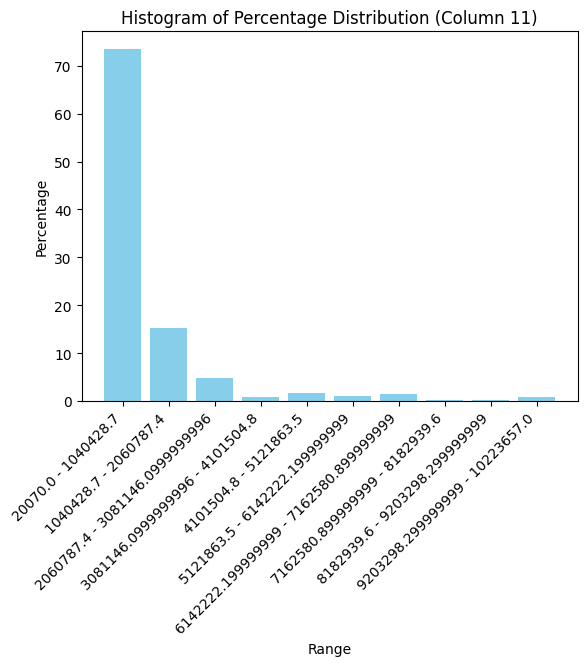

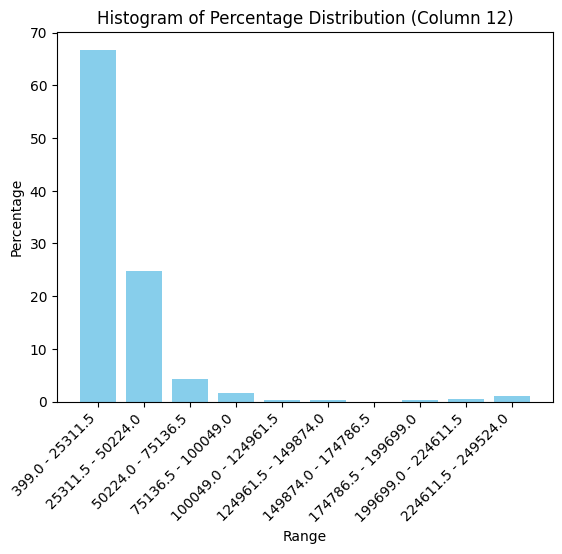

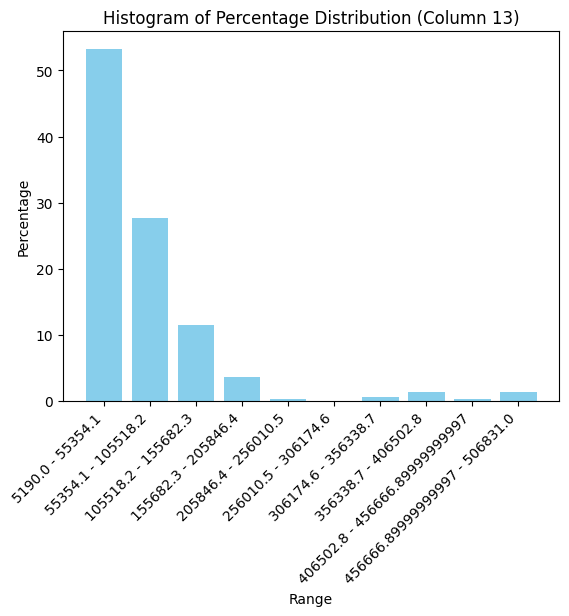

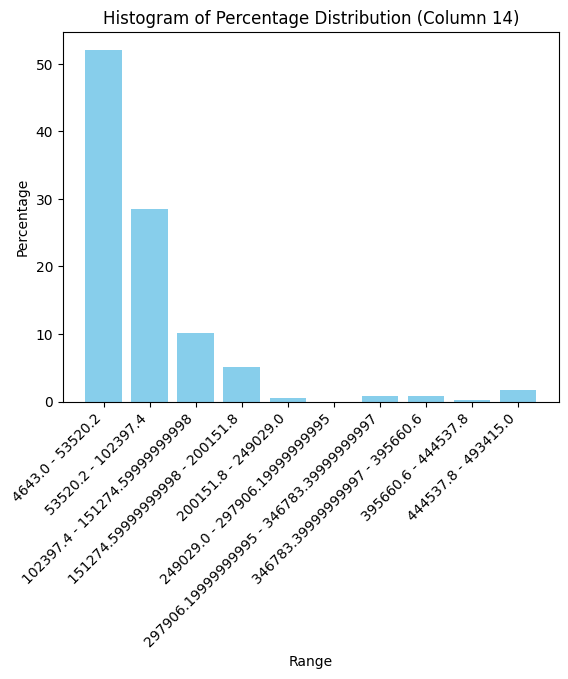

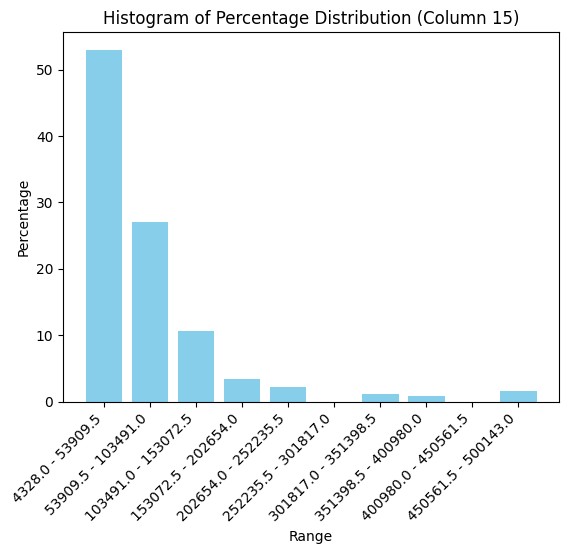

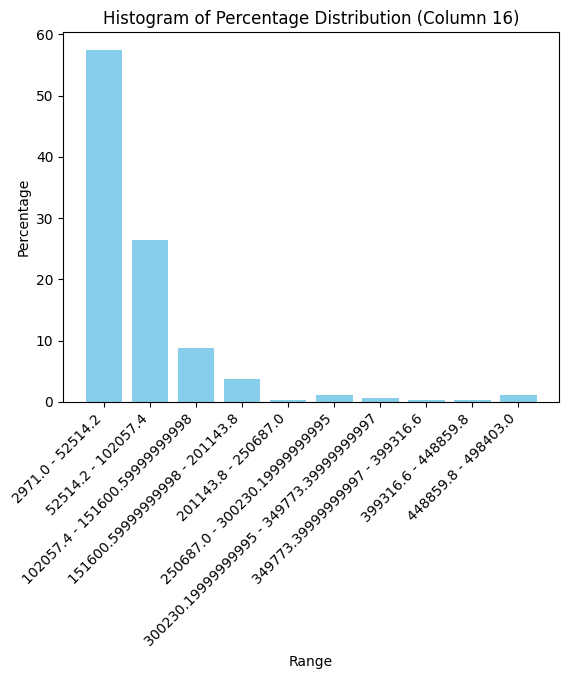

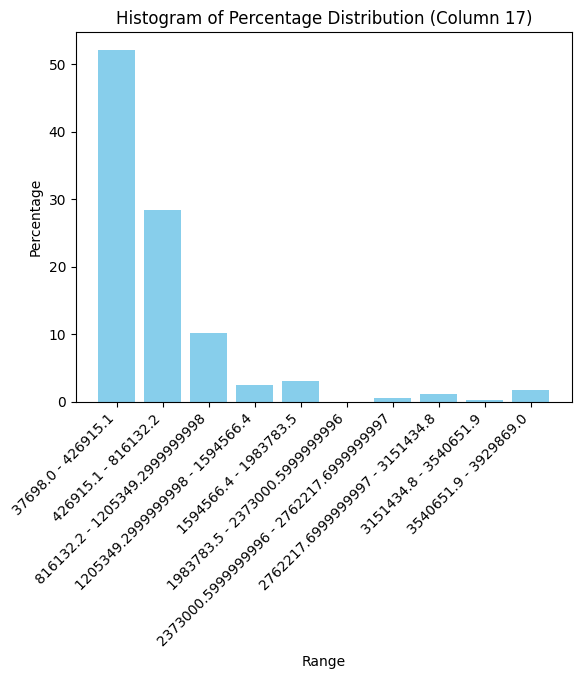

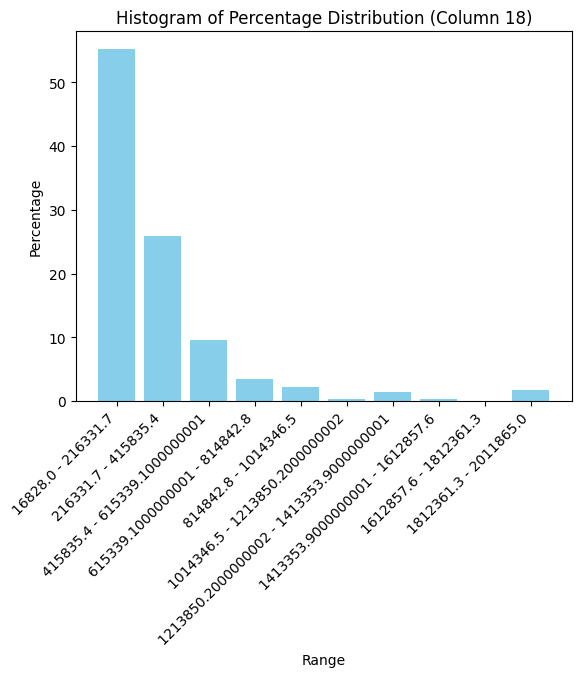

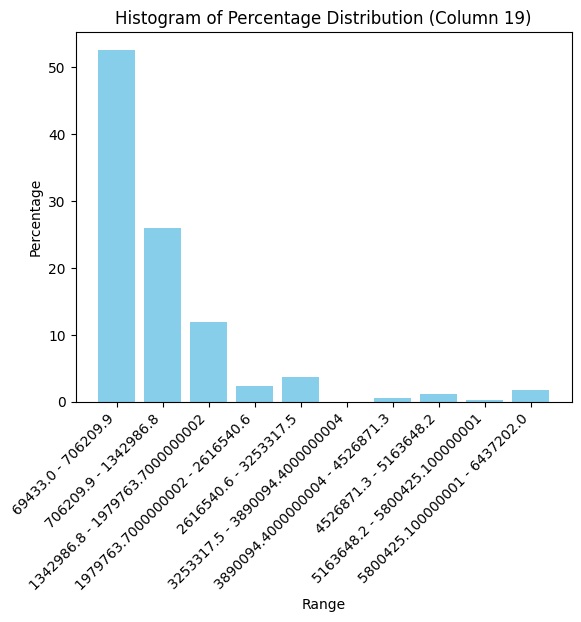

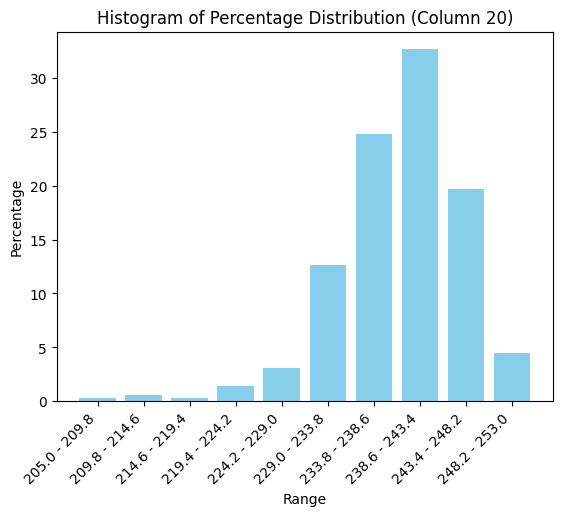

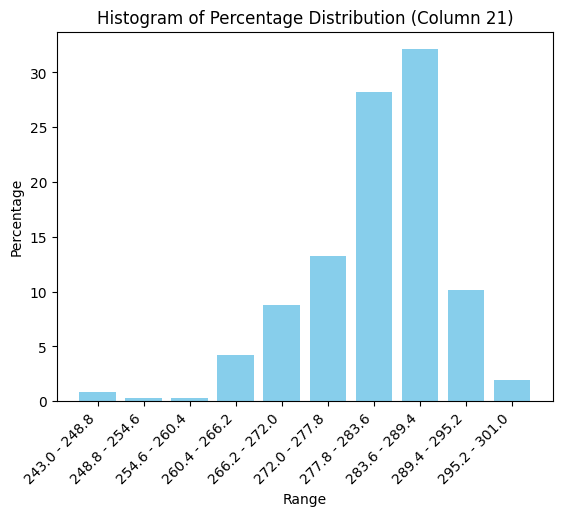

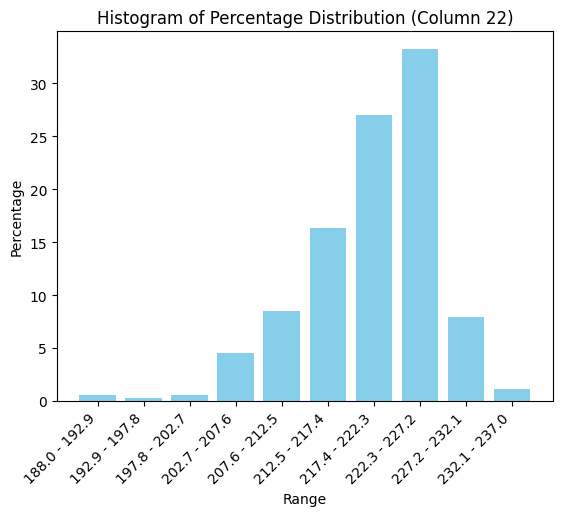

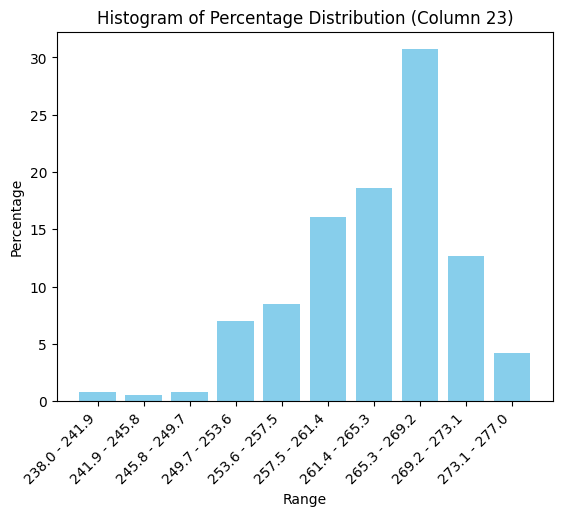

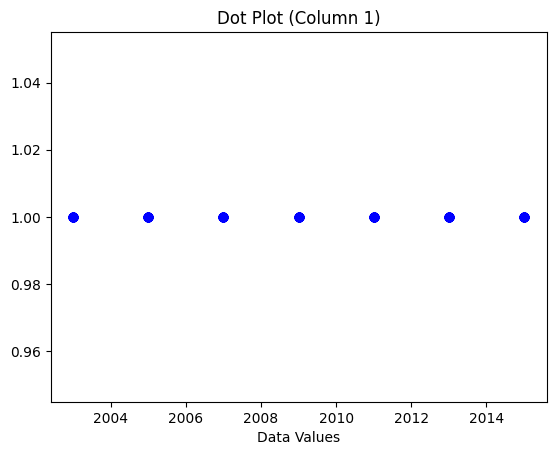

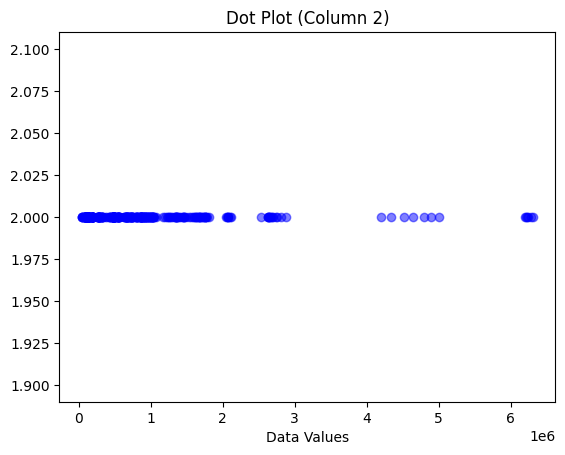

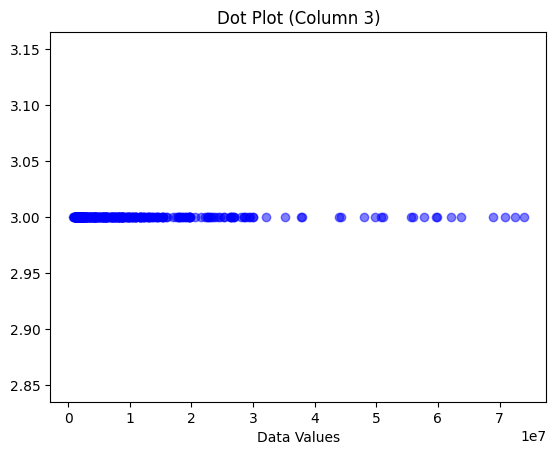

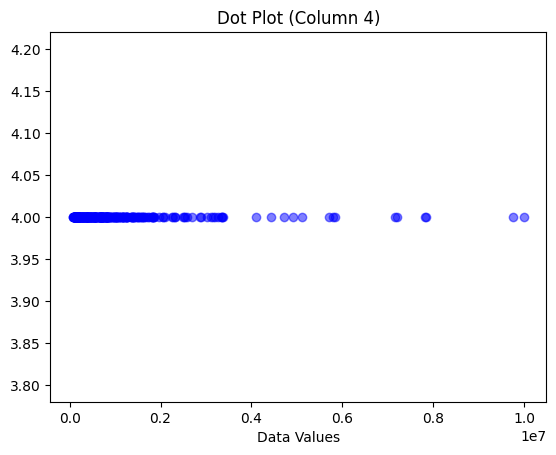

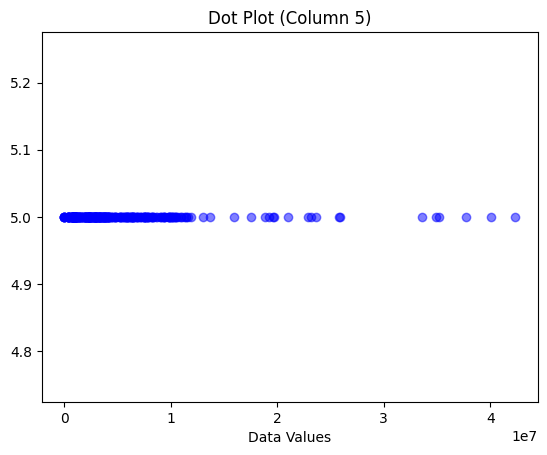

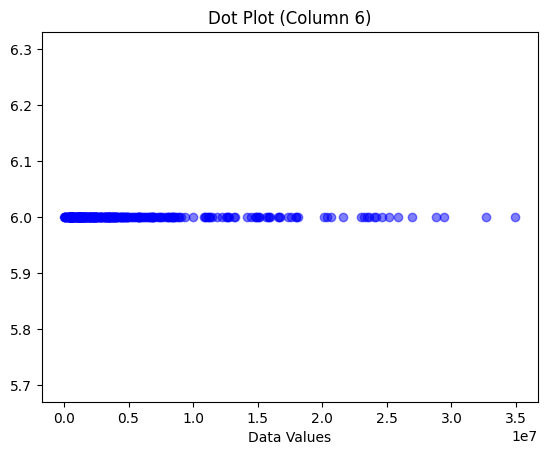

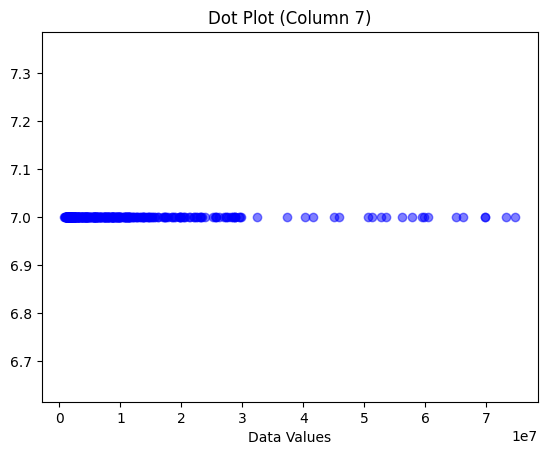

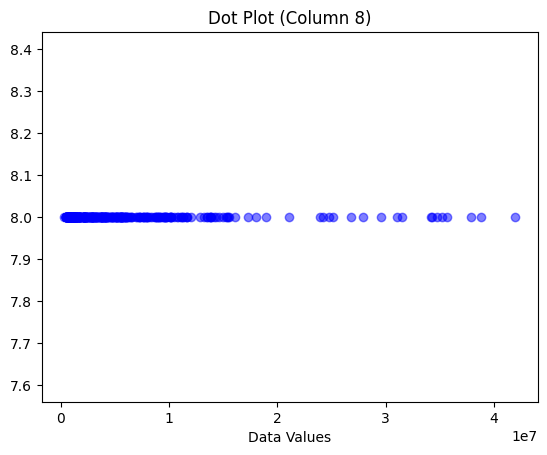

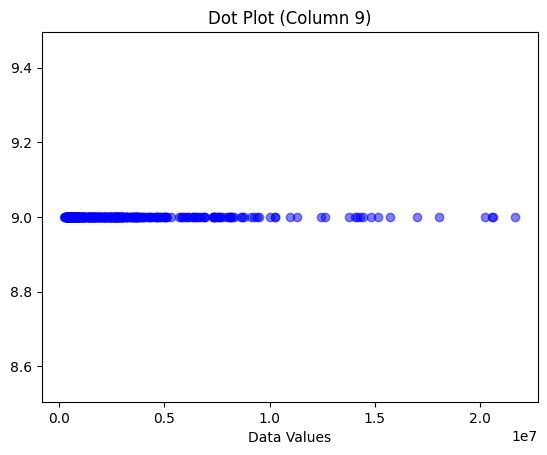

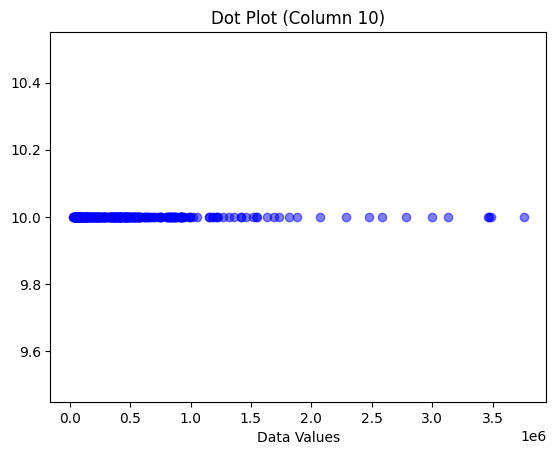

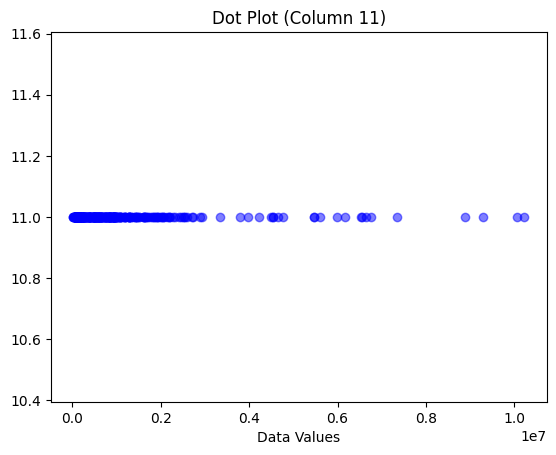

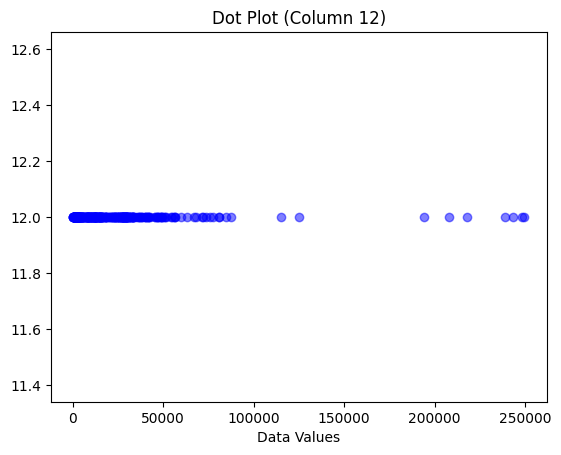

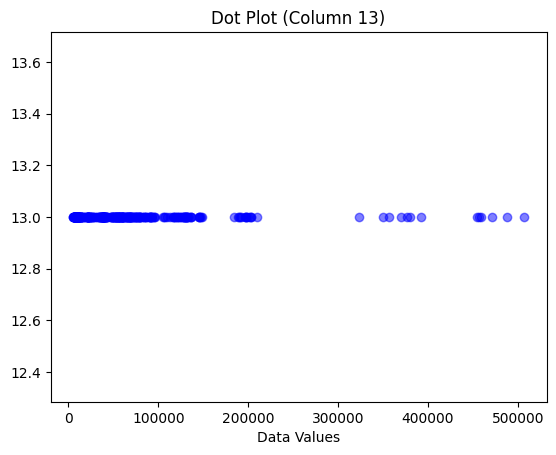

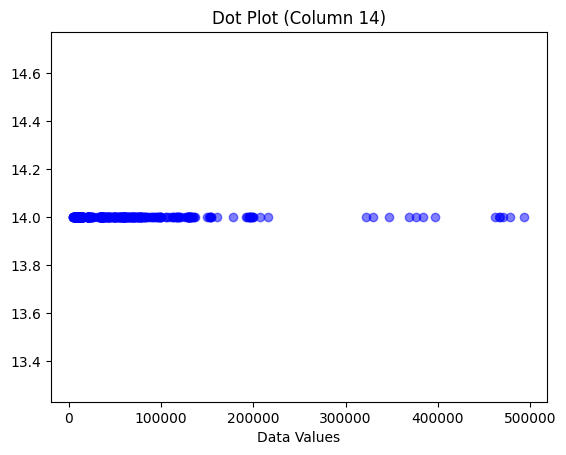

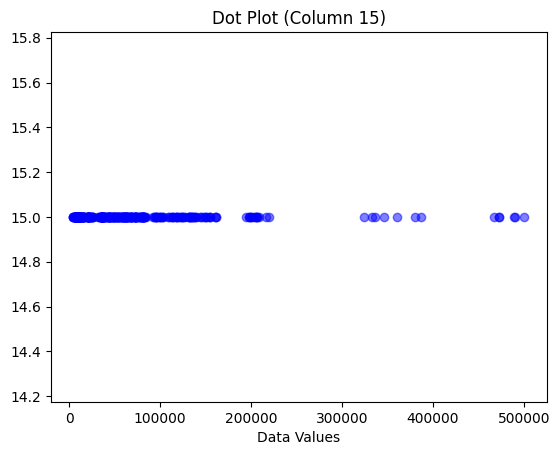

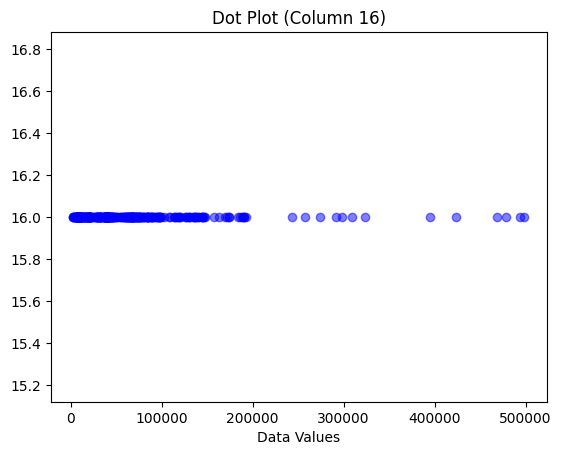

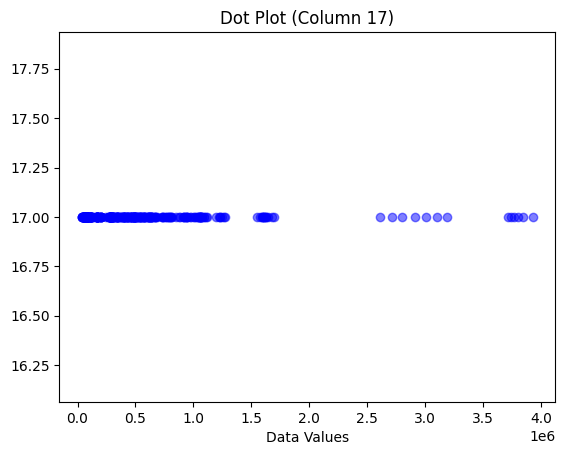

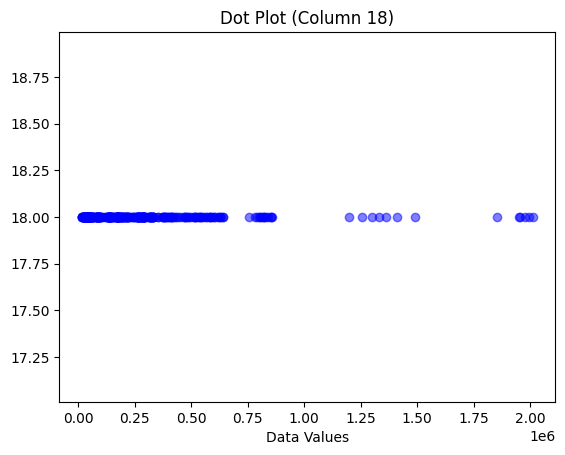

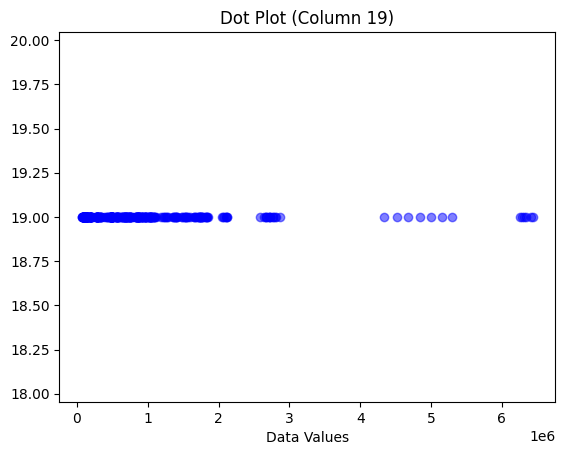

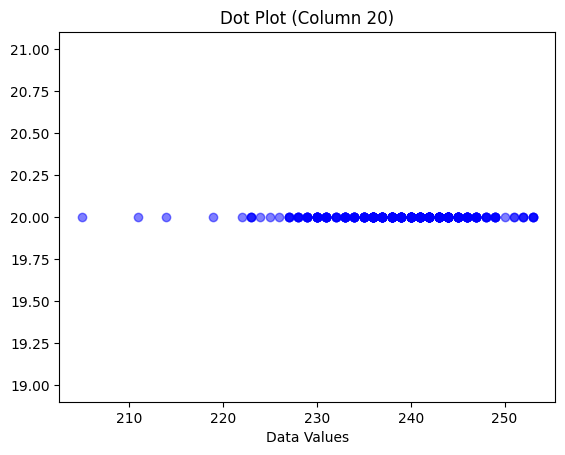

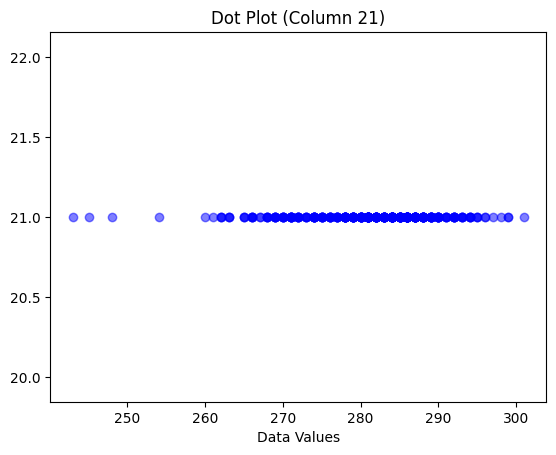

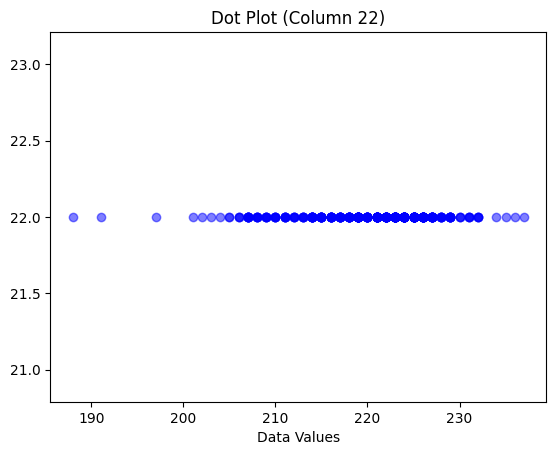

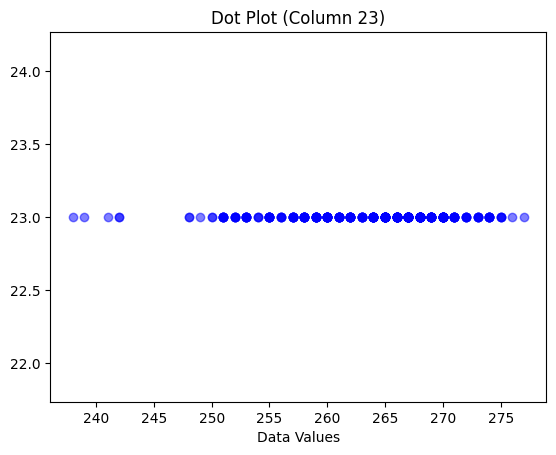

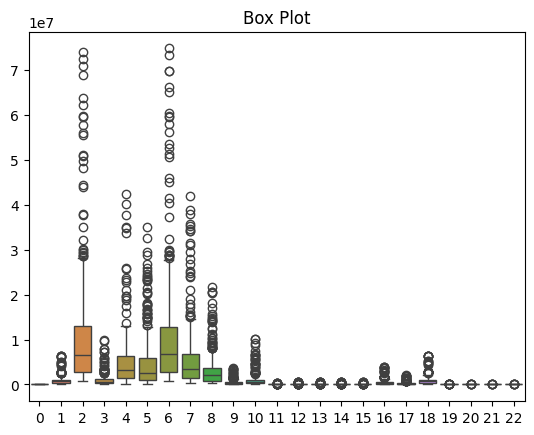


Skewness: [ 0.00622459  2.90401356  2.56261876  3.64306023  3.29826362  2.17314391
  2.57819982  2.70898275  2.3989169   2.93651152  3.35152676  4.29666834
  2.96526822  2.92955027  2.88407292  3.11551388  2.90014127  2.93352797
  2.88768786 -0.96078678 -0.90804411 -0.87361526 -0.84083362]
Types: ['Positively skewed (Right-skewed)', 'Positively skewed (Right-skewed)', 'Positively skewed (Right-skewed)', 'Positively skewed (Right-skewed)', 'Positively skewed (Right-skewed)', 'Positively skewed (Right-skewed)', 'Positively skewed (Right-skewed)', 'Positively skewed (Right-skewed)', 'Positively skewed (Right-skewed)', 'Positively skewed (Right-skewed)', 'Positively skewed (Right-skewed)', 'Positively skewed (Right-skewed)', 'Positively skewed (Right-skewed)', 'Positively skewed (Right-skewed)', 'Positively skewed (Right-skewed)', 'Positively skewed (Right-skewed)', 'Positively skewed (Right-skewed)', 'Positively skewed (Right-skewed)', 'Positively skewed (Right-skewed)', 'Negatively skew

In [40]:
# === Main Program ===
data = get_data()
mean, median, mode, data_range, variance, std_dev = calculate_statistics(data)

# Tampilkan hasil statistik
print(f"Mean: {mean}\nMedian: {median}\nMode: {mode}\nRange: {data_range}\nVariance: {variance}\nStandard Deviation: {std_dev}")

bins = determine_bins(data)
freq_tables = create_frequency_distribution(data, bins)

# Tampilkan tabel distribusi frekuensi
for i, table in enumerate(freq_tables):
    print(f"\n=== Frequency Distribution (Column {i+1}) ===")
    print(table)

# Plot grafik
plot_histogram(freq_tables)
plot_dotplot(data)
plot_boxplot(data)

# Hitung dan tampilkan skewness
skewness, skew_types = calculate_skewness(data)
print(f"\nSkewness: {skewness}\nTypes: {skew_types}")